In [1]:
!pip install patchify
!pip install opencv-python

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import random


In [3]:
#MinMaxScaler
minmaxscaler = MinMaxScaler()


image_patch_size = 256

In [4]:
dataset_root_folder = "C:\\Users\\prave\\OneDrive\\Desktop\\Capstone\\DataSets"

In [5]:
dataset_name = "SemanticSegmentationDataset"

In [6]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
    dir_name = path.split(os.path.sep)[-1]
    print(dir_name) #prints the directories and its sub directories names
    # if dir_name == 'masks' :
    #   images = os.listdir(path)
    #   print(path)
    #   for i, image_name in enumerate(images):
    #     if image_name.endswith(".png"):  #'.jpg'
    #       # print(image_name)
    #       a = True

SemanticSegmentationDataset
Tile 1
images
masks
Tile 2
images
masks
Tile 3
images
masks
Tile 4
images
masks
Tile 5
images
masks
Tile 6
images
masks
Tile 7
images
masks
Tile 8
images
masks


In [7]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [8]:
image.shape

(544, 509, 3)

In [9]:
print(type(image))

<class 'numpy.ndarray'>


In [10]:
print(type(Image.fromarray(image)))

<class 'PIL.Image.Image'>


* Image is the ndimentional array
* Uses the patchify to crop and resize the images

In [11]:
print(image.shape)

(image.shape[0]//image_patch_size)*image_patch_size


(544, 509, 3)


512

In [12]:
image_patches = patchify(image,(image_patch_size,image_patch_size,3), step=image_patch_size)

In [13]:
image_patches

array([[[[[[ 57,  72,  81],
           [ 50,  65,  74],
           [ 72,  84,  94],
           ...,
           [186, 186, 186],
           [224, 227, 225],
           [214, 215, 211]],

          [[ 53,  67,  79],
           [ 60,  75,  84],
           [ 82,  94, 106],
           ...,
           [148, 148, 148],
           [216, 217, 215],
           [202, 203, 201]],

          [[ 67,  78,  92],
           [101, 113, 125],
           [107, 116, 130],
           ...,
           [114, 114, 114],
           [221, 222, 220],
           [173, 174, 172]],

          ...,

          [[ 97,  98, 108],
           [ 72,  73,  83],
           [ 74,  74,  86],
           ...,
           [ 65,  66,  76],
           [ 70,  72,  83],
           [ 71,  71,  83]],

          [[ 92,  91, 100],
           [ 88,  90,  98],
           [ 95,  96, 106],
           ...,
           [ 74,  75,  85],
           [ 38,  40,  51],
           [  0,   0,  10]],

          [[ 86,  86,  92],
           [ 79,  79,  85]

In [14]:
len(image_patches)

2

In [15]:
image_patches.shape

(2, 1, 1, 256, 256, 3)

In [16]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler

image_y = minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)


In [17]:
image_y[0].shape

(256, 256, 3)

In [18]:
len(image_patches.shape)

# lenght indicates the no.of images reattached

6

In [19]:
image_dataset = []
mask_dataset = []

for image_type in ['images','masks']:
  if image_type == 'images':
    image_extention = 'jpg'
  elif image_type == 'masks':
    image_extention = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extention}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        # print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        # print("{}--{}-{}".format(image.shape,size_x,size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0,size_x,size_y))
        # print("({}, {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_image = patchify(image,(image_patch_size,image_patch_size,3), step=image_patch_size)
        # print(len(patched_image))
        for i in range(patched_image.shape[0]):
          for j in range(patched_image.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_image[i,j,:,:]
              # print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              # print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_image[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [20]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [21]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [22]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [23]:
type(image_dataset[0])

numpy.ndarray

In [24]:
#if we reshpe the image and convert it into patched_image_size

type(np.reshape(image_dataset[0],(image_patch_size,image_patch_size,3)))

numpy.ndarray

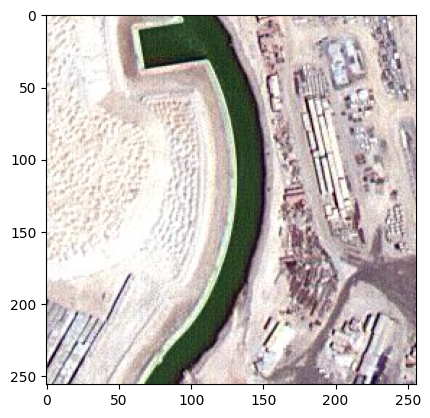

In [25]:
plt.imshow(image_dataset[0])

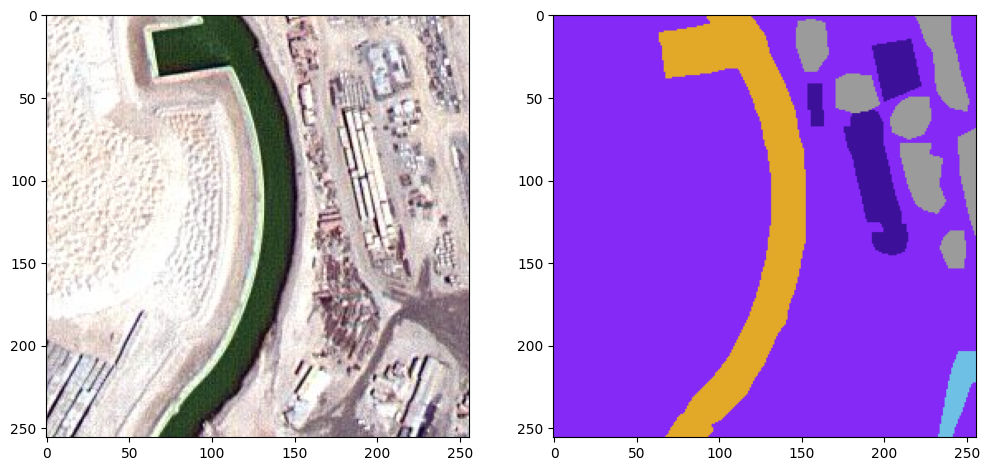

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(image_dataset[0])
plt.subplot(1,2,2)
plt.imshow(mask_dataset[0])

Text(0.5, 1.0, 'Image + Mask')

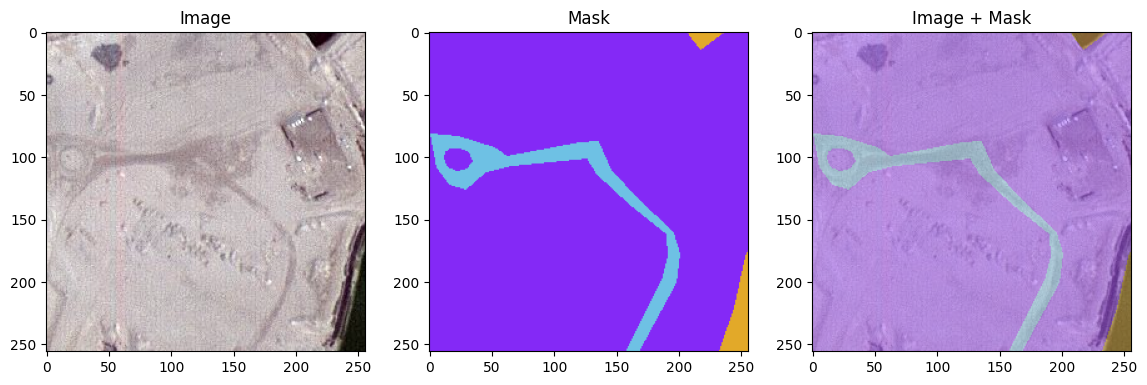

In [27]:
# random_image_index = random.randint(0,len(image_dataset))
random_image_index = 15

plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
plt.imshow(image_dataset[random_image_index])
plt.title('Image')
plt.subplot(1,3,2)
plt.imshow(mask_dataset[random_image_index])
plt.title('Mask')
plt.subplot(1,3,3)
plt.imshow(image_dataset[random_image_index],alpha=0.8)
plt.imshow(mask_dataset[random_image_index],alpha=0.4)
plt.title('Image + Mask')


* Processing Mask Image Labels(Color code to One-Hot encoding tranformation)
* applying One_Hot encoding with labels Hex images type to set RGB/Label


In [28]:
# Water: #E2A929 , class=0
# Land (unpaved area): #8429F6 , class=1
# Road: #6EC1E4 , class=2
# Building: #3C1098 , class=3
# Vegetation: #FEDD3A , class=4
# Unlabeled: #9B9B9B , class=5

In [29]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
# 3c 10 98 hex to RGB
class_building = np.array([int(class_building[i:i+2],16) for i in range(0,len(class_building),2)])
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array([int(class_land[i:i+2],16) for i in range(0,len(class_land),2)])
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array([int(class_road[i:i+2],16) for i in range(0,len(class_road),2)])
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array([int(class_vegetation[i:i+2],16) for i in range(0,len(class_vegetation),2)])
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array([int(class_water[i:i+2],16) for i in range(0,len(class_water),2)])
print(class_water)

Unlabeled = '#9B9B9B'
Unlabeled = Unlabeled.lstrip('#')
Unlabeled = np.array([int(Unlabeled[i:i+2],16) for i in range(0,len(Unlabeled),2)])
print(Unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


These are the mask label which are in the mask_dataset folder

Need to create a method which converts RGB values to 2D label

In [30]:
#Creating labels from label_dataset through iterating over it

print(mask_dataset.shape[0])

945


In [31]:
label = individual_patched_mask

In [32]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape,dtype=np.uint8)
  # print(label_segment.shape)
  label_segment[np.all(label==class_water,axis=-1)] = 0
  label_segment[np.all(label==class_land,axis=-1)] = 1
  label_segment[np.all(label==class_road,axis=-1)] = 2
  label_segment[np.all(label==class_building,axis=-1)] = 3
  label_segment[np.all(label==class_vegetation,axis=-1)] = 4
  label_segment[np.all(label==Unlabeled,axis=-1)] = 5
  label_segment = label_segment[:,:,0]
  return label_segment

In [33]:
labels = []
for i in range(mask_dataset.shape[0]):
  # label = mask_dataset[i]
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [34]:
print(len(labels))

945


In [35]:
labels = np.array(labels)

In [36]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [37]:
# expand the array into singel array
labels = np.expand_dims(labels,axis=3)

In [38]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [39]:
#prints the unique values(classes)
print("Totol no of unique value(classes):", format(np.unique(labels)))

Totol no of unique value(classes): [0 1 2 3 4 5]


Text(0.5, 1.0, 'Image + Label')

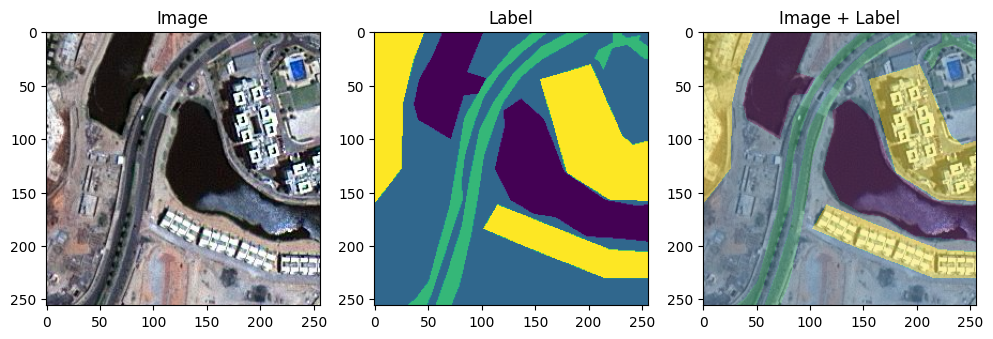

In [40]:
random_image_index = random.randint(0,len(image_dataset))

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(image_dataset[random_image_index])
plt.title('Image')

plt.subplot(1,3,2)
# plt.imshow(label_dataset[random_image_index])
plt.imshow(labels[random_image_index][:,:,0])
plt.title('Label')

plt.subplot(1,3,3)
plt.imshow(image_dataset[random_image_index],alpha=0.8)
plt.imshow(labels[random_image_index][:,:,0],alpha=0.4)
plt.title('Image + Label')

Training and Testing Data for the Model

In [41]:
!pip install tensorflow==2.10.0 --no-cache-dir

In [42]:
from tensorflow import keras
from keras.utils import to_categorical


In [43]:
import tensorflow as tf
# from tensorflow import keras

# from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [44]:
master_training_dataset = image_dataset

In [45]:
total_classes = len(np.unique(labels))

In [46]:
print(total_classes)

6


In [47]:
labels_categorical_dataset = to_categorical(labels,num_classes=total_classes)


In [48]:
print('size and shape with no.of clasess in each image')
print(labels_categorical_dataset.shape)
print('\n shape of input datasets')
print(image_dataset.shape)

size and shape with no.of clasess in each image
(945, 256, 256, 6)

 shape of input datasets
(945, 256, 256, 3)


In [49]:
# Spliting the data into Training and Testing sets

In [50]:
#classifing the model-1
X_train,X_test,y_train,y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.2, random_state=42)


In [51]:
# printing the shapes of the training and testing

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(756, 256, 256, 3)
(189, 256, 256, 3)
(756, 256, 256, 6)
(189, 256, 256, 6)


In [52]:
# image dimentions

image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


**Integrating Deep Learning Network**

STEPS:

1) Evalution Matrix : Jaccord index / Intersection over Union(IoU)

2) DL Model i.e U-net model

3) Lost function :Focal Loss( Cross Entrophy Loss Extention)

4) Training the DL model

​

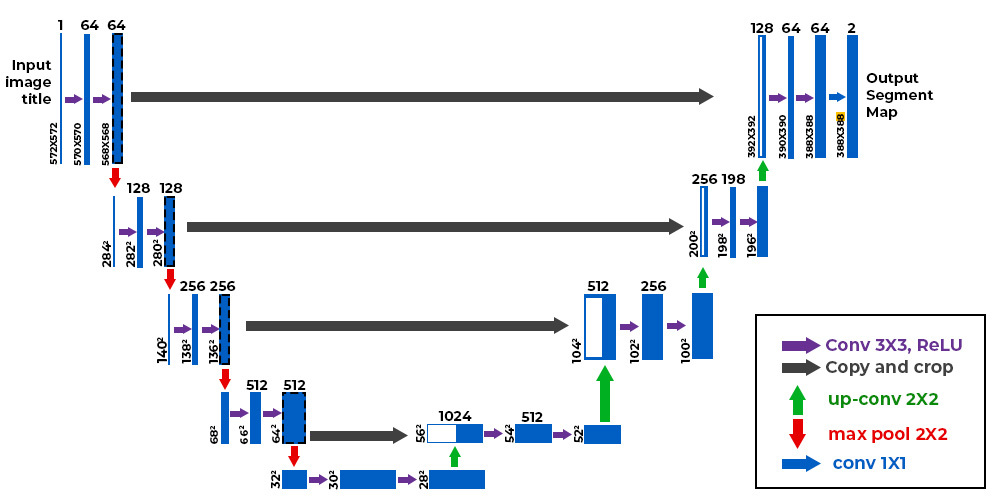

[U-net Architecture Link](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/)

In [53]:
# keras is high level API model Label library (used to build layers)
# Keras is used as the building blocks in DL model
# we can use anything as backend for keras i.e DL models
# backend means tensor level calculation(where tensor is skeleton and backend is the calcus)
# Deeplevel calculation(Math) is done at the tensor level by the backend

# here we are using Tensorflow as backend for keras
# and U-net model for the classification task

In [54]:
!pip install -U segmentation-models

In [55]:
from tensorflow.keras.models import Model

from tensorflow.keras import models
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

from keras import backend as K

In [56]:
# Impelmenting U-net model architechture

def multi_unet_model(n_classes=6, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=3):

  inputs = Input((IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS))

  source_input = inputs

  #contracting path
  c1 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)
  p5 = MaxPooling2D((2,2))(c5)

  #Expansive path
  # upsampling
  u6 = Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
  u6 = concatenate([u6,c4])
  c6 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c6)

  u7 = Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
  u7 = concatenate([u7,c3])
  c7 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c7)

  u8 = Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
  u8 = concatenate([u8,c2])
  c8 = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c8)

  u9 = Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
  u9 = concatenate([u9,c1], axis = 3)
  c9 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c9)

  outputs = Conv2D(n_classes,(1,1),activation='softmax')(c9)

  model = Model(inputs=[inputs],outputs=[outputs])
  return model


In [57]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          IMG_HEIGHT=image_height,
                          IMG_WIDTH=image_width,
                          IMG_CHANNELS=image_channels)

In [58]:
model = get_deep_learning_model()


In [59]:
model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'config': {'name': '

In [60]:
#Loss Function: Focal Loss(extention of cross entrophy loss)

weights = [0.1666,0.1666,0.1666,0.1666,0.1666,0.1666]


In [61]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [62]:
# Jaccard coefficent (IoU = Intersection/Union)

def jaccard_coef(y_true,y_pred):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)

  intersection = K.sum(y_true_f * y_pred_f)
  final_coef_value = (intersection + 1.0 ) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)  #smoothing value = 1.0
  return final_coef_value

In [63]:
dice_loss = sm.losses.DiceLoss(class_weights= weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

In [64]:
tf.keras.backend.clear_session()

In [65]:
model.compile(optimizer='adam',loss=total_loss,metrics=['accuracy',jaccard_coef])

In [66]:
model.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 32  0           ['conv2d_14[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 256, 256, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatena

In [67]:
#To visualize the DL model we have constructed
#saving to the local directory...

from keras.utils.vis_utils import plot_model

In [68]:
plot_model(model, to_file = "D:\\Capstone-A\\codes\\Unet\\Unet_model.pdf", show_shapes=True, show_layer_names=True)

In [69]:
model_history = model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1, validation_data = ( X_test, y_test ), shuffle = False)

Epoch 1/100
48/48 [==============================] - 114s 2s/step - loss: 1.0026 - accuracy: 0.5390 - jaccard_coef: 0.2606 - val_loss: 0.9931 - val_accuracy: 0.5833 - val_jaccard_coef: 0.2667
Epoch 2/100
48/48 [==============================] - 113s 2s/step - loss: 0.9856 - accuracy: 0.6599 - jaccard_coef: 0.3380 - val_loss: 0.9783 - val_accuracy: 0.6901 - val_jaccard_coef: 0.3789
Epoch 3/100
48/48 [==============================] - 114s 2s/step - loss: 0.9663 - accuracy: 0.7068 - jaccard_coef: 0.4308 - val_loss: 0.9710 - val_accuracy: 0.6993 - val_jaccard_coef: 0.4363
Epoch 4/100
48/48 [==============================] - 139s 3s/step - loss: 0.9573 - accuracy: 0.7337 - jaccard_coef: 0.4765 - val_loss: 0.9571 - val_accuracy: 0.7292 - val_jaccard_coef: 0.5049
Epoch 5/100
48/48 [==============================] - 145s 3s/step - loss: 0.9508 - accuracy: 0.7507 - jaccard_coef: 0.5085 - val_loss: 0.9555 - val_accuracy: 0.7286 - val_jaccard_coef: 0.4955
Epoch 6/100
48/48 [=====================

48/48 [==============================] - 159s 3s/step - loss: 0.9069 - accuracy: 0.8686 - jaccard_coef: 0.7193 - val_loss: 0.9189 - val_accuracy: 0.8414 - val_jaccard_coef: 0.6960
Epoch 44/100
48/48 [==============================] - 127s 3s/step - loss: 0.9062 - accuracy: 0.8703 - jaccard_coef: 0.7231 - val_loss: 0.9175 - val_accuracy: 0.8465 - val_jaccard_coef: 0.7001
Epoch 45/100
48/48 [==============================] - 138s 3s/step - loss: 0.9050 - accuracy: 0.8739 - jaccard_coef: 0.7306 - val_loss: 0.9173 - val_accuracy: 0.8484 - val_jaccard_coef: 0.7036
Epoch 46/100
48/48 [==============================] - 124s 3s/step - loss: 0.9050 - accuracy: 0.8729 - jaccard_coef: 0.7314 - val_loss: 0.9222 - val_accuracy: 0.8399 - val_jaccard_coef: 0.6953
Epoch 47/100
48/48 [==============================] - 125s 3s/step - loss: 0.9047 - accuracy: 0.8727 - jaccard_coef: 0.7334 - val_loss: 0.9170 - val_accuracy: 0.8471 - val_jaccard_coef: 0.7016
Epoch 48/100
48/48 [============================

48/48 [==============================] - 126s 3s/step - loss: 0.8871 - accuracy: 0.9035 - jaccard_coef: 0.7925 - val_loss: 0.9134 - val_accuracy: 0.8615 - val_jaccard_coef: 0.7344
Epoch 86/100
48/48 [==============================] - 124s 3s/step - loss: 0.8889 - accuracy: 0.8999 - jaccard_coef: 0.7860 - val_loss: 0.9139 - val_accuracy: 0.8581 - val_jaccard_coef: 0.7285
Epoch 87/100
48/48 [==============================] - 111s 2s/step - loss: 0.8895 - accuracy: 0.8974 - jaccard_coef: 0.7805 - val_loss: 0.9138 - val_accuracy: 0.8595 - val_jaccard_coef: 0.7312
Epoch 88/100
48/48 [==============================] - 111s 2s/step - loss: 0.8887 - accuracy: 0.9017 - jaccard_coef: 0.7886 - val_loss: 0.9154 - val_accuracy: 0.8540 - val_jaccard_coef: 0.7223
Epoch 89/100
48/48 [==============================] - 113s 2s/step - loss: 0.8877 - accuracy: 0.9038 - jaccard_coef: 0.7921 - val_loss: 0.9179 - val_accuracy: 0.8525 - val_jaccard_coef: 0.7232
Epoch 90/100
48/48 [============================

In [104]:
#Calculating the loss and accuracy graphs

history_a = model_history

In [105]:
history_a.history

{'loss': [1.0025651454925537,
  0.9855852127075195,
  0.966254472732544,
  0.9572657942771912,
  0.9508441686630249,
  0.9503387808799744,
  0.9451650977134705,
  0.9450958967208862,
  0.941669762134552,
  0.9400684833526611,
  0.9368914365768433,
  0.9359079003334045,
  0.9329958558082581,
  0.9295757412910461,
  0.9286542534828186,
  0.9269000887870789,
  0.9267923831939697,
  0.9237504601478577,
  0.9219071865081787,
  0.9205335378646851,
  0.9208687543869019,
  0.9193848967552185,
  0.9195547103881836,
  0.9180150628089905,
  0.9176517128944397,
  0.9194964170455933,
  0.9173205494880676,
  0.9162529706954956,
  0.9155276417732239,
  0.9148648381233215,
  0.9146139025688171,
  0.9141415953636169,
  0.9149647951126099,
  0.9125674366950989,
  0.9111732840538025,
  0.9113122820854187,
  0.914542555809021,
  0.9123993515968323,
  0.9096939563751221,
  0.9085932374000549,
  0.9081243872642517,
  0.9069222807884216,
  0.9068578481674194,
  0.9062327742576599,
  0.9049767255783081,
  0.9

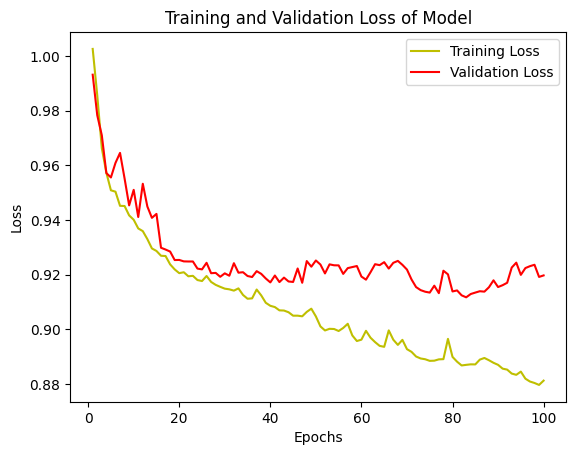

In [110]:
# Loss vs Validation graphs of Model-1
#Here our target is to reach the training loss - '0' (Minimum)

loss = history_a.history['loss']
val_loss = history_a.history['val_loss']

epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss of Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

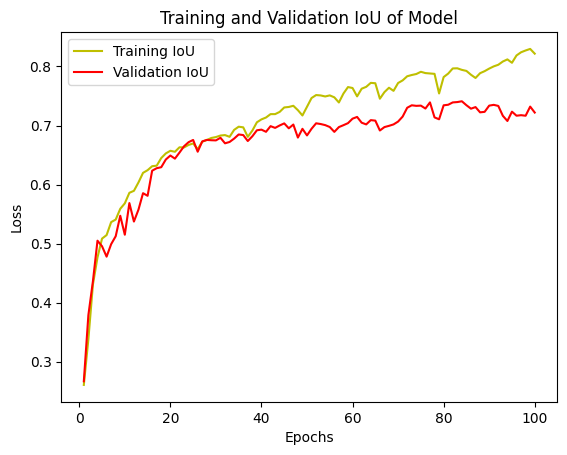

In [111]:
# jaccard vs validation jaccard coefficient graph of Model-1
#Here our target is to reach the training jaccard(IoU) - '1' (Maximum)

jaccard = history_a.history['jaccard_coef']
val_jaccard = history_a.history['val_jaccard_coef']

epochs = range(1,len(jaccard)+1)
plt.plot(epochs,jaccard,'y',label='Training IoU')  #Training Jaccard
plt.plot(epochs,val_jaccard,'r',label='Validation IoU')  #Validation Jaccard
plt.title('Training and Validation IoU of Model')
plt.xlabel('Epochs')
plt.ylabel('Loss') #Jaccard
plt.legend()
plt.show()

In [112]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 48}

In [113]:
y_pred = model.predict(X_test)

6/6 [==============================] - 4s 616ms/step


In [114]:
len(y_pred)

189

In [123]:
y_pred

array([[[[1.86105222e-02, 9.37324107e-01, 2.36860346e-02,
          1.51248220e-02, 5.12309931e-03, 1.31431181e-04],
         [1.02988724e-02, 9.69375968e-01, 1.45345107e-02,
          4.58049262e-03, 1.20295375e-03, 7.12727751e-06],
         [4.92703449e-03, 9.82371092e-01, 1.11851590e-02,
          1.11664215e-03, 3.97250784e-04, 2.82009501e-06],
         ...,
         [9.75783449e-03, 9.76688445e-01, 1.01444582e-02,
          1.56300981e-03, 1.83073455e-03, 1.55864982e-05],
         [1.53856771e-02, 9.66737509e-01, 1.05952201e-02,
          2.61752983e-03, 4.62082494e-03, 4.31722547e-05],
         [3.74820307e-02, 8.86073768e-01, 3.68922949e-02,
          1.09543297e-02, 2.73798648e-02, 1.21768820e-03]],

        [[2.48287665e-03, 9.85871792e-01, 8.88232421e-03,
          2.28784047e-03, 4.68143466e-04, 7.05572302e-06],
         [1.12210121e-03, 9.93164361e-01, 5.03691006e-03,
          6.23560802e-04, 5.26731674e-05, 3.38250487e-07],
         [4.13110654e-04, 9.96096313e-01, 3.3405

In [124]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [125]:
len(y_pred_argmax)

189

In [126]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 

In [127]:
y_test

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [128]:
y_test_argmax = np.argmax(y_test, axis = 3)

In [129]:
y_test_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [2, 1, 1, ..., 

Predicting and Camparing the images

using the original image, labeled image and predicted image

In [130]:
test_image_number = 10

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis =3)


1/1 [==============================] - 0s 44ms/step


In [131]:
predicted_image

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [3, 3, 3, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]]], dtype=int64)

In [132]:
predicted_image = predicted_image[0, :, :]
predicted_image

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [3, 3, 3, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]], dtype=int64)

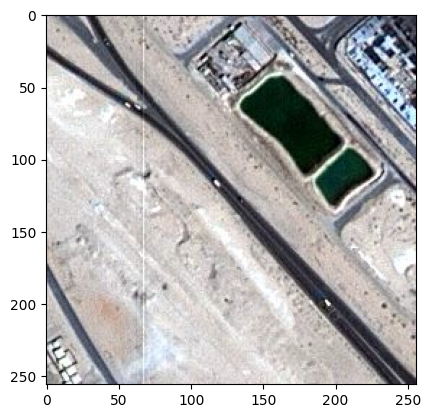

In [133]:
plt.imshow(test_image)

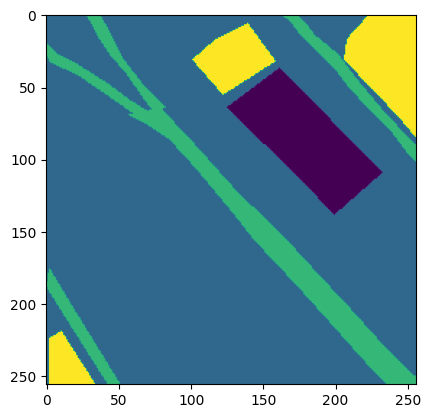

In [134]:
plt.imshow(ground_truth_image)

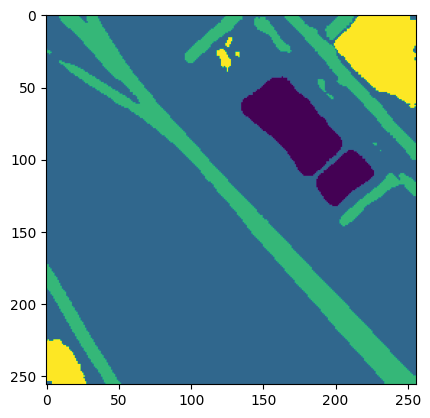

In [135]:
plt.imshow(predicted_image)

In [136]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis =3)
predicted_image = predicted_image[0, :, :]


1/1 [==============================] - 0s 49ms/step


C:\Users\prave\AppData\Local\Temp\ipykernel_20900\1708711051.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,1)
C:\Users\prave\AppData\Local\Temp\ipykernel_20900\1708711051.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,2)


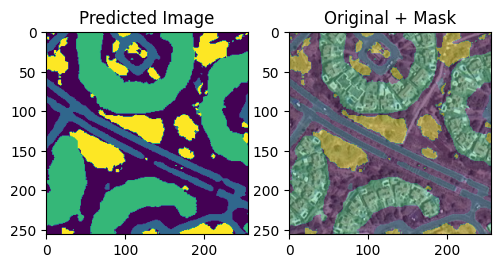

In [137]:
plt.figure(figsize = (12,6))

plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(test_image)

plt.subplot(1,4,2)
plt.title("Original Mask Image")
plt.imshow(ground_truth_image)

plt.subplot(2,4,1)
plt.title("Predicted Image")
plt.imshow(predicted_image)

plt.subplot(2,4,2)
plt.title("Original + Mask")
plt.imshow(test_image, alpha = 0.8)
plt.imshow(predicted_image, alpha = 0.4)

plt.show()

# for the centerline images ploting come under this imgages

In [138]:
model.save("D:\\Capstone-A\\codes\\Unet\\Unet_100epochs.h5")

In [140]:
os.listdir("D:\\Capstone-A\\codes\\Unet\\")

['Unet_100epochs.h5',
 'Unet_model.pdf',
 'Unet_SatelliteSegmentation_custom_Input_prediction.ipynb']

**Model Saving and Relaoding(Inference) with costomloss**




In [94]:
# model.config()

In [141]:
from  keras.models import load_model

In [142]:
model.loss.name

'dice_loss_plus_1focal_loss'

In [160]:
saved_model = load_model("D:\\Capstone-A\\codes\\Unet\\Unet_100epochs.h5",compile=False)
#                          custom_objects = {'dice_loss_plus_1focal_loss':total_loss,'jaccard_coef':jaccard_coef})

In [161]:
# saved_model.get_config()

Performing predictions using the custom image from Google Maps

In [162]:
# Getting the image

image = Image.open("C:\\Users\\prave\\OneDrive\\Desktop\\d.jpg")
image = image.convert('RGB')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, axis = 0)



In [163]:
print(image.shape)

(1, 256, 256, 3)


In [164]:
prediction = saved_model.predict(image)


1/1 [==============================] - 0s 347ms/step


In [165]:
predicted_image = np.argmax(prediction, axis =3)
predicted_image = predicted_image[0,:,:]

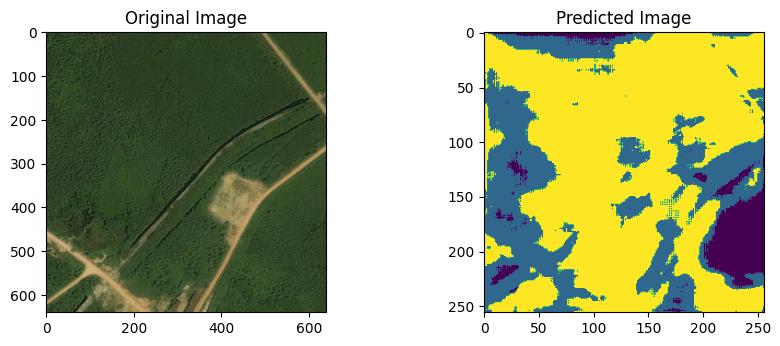

In [166]:

plt.figure(figsize = (16,8))

plt.subplot(2,3,1)
plt.title("Original Image")
plt.imshow(Image.open("C:\\Users\\prave\\OneDrive\\Desktop\\d.jpg"))

plt.subplot(2,3,2)
plt.title("Predicted Image")
plt.imshow(predicted_image)